In [8]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_distribution

In [9]:
def flip_sign(v, n):
    w = [0] * 2**n
    w[v] = 1
    w = np.array([w]).T
    U = w @ w.T
    U = np.eye(w.shape[0]) - 2 * U
    U = DensityMatrix(U).to_operator()
    return U


v = 1
n = 2
print(flip_sign(v, n))

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [10]:
def phase_shift(s):
    U = s @ s.T
    U = 2 * U - np.eye(s.shape[0])
    U = DensityMatrix(U).to_operator()
    return U


s = (1 / 2) * np.array([[1], [1], [1], [1]])
print(phase_shift(s))

Operator([[-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j],
          [ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [11]:
def Grover(v, qubits):

    M = len(v)
    N = 2**qubits
    theta = np.arcsin(np.sqrt(M / N))
    R = int(np.ceil(np.pi / (4 * theta)))

    qreg = QuantumRegister(qubits)
    creg = ClassicalRegister(qubits)
    qc = QuantumCircuit(qreg, creg)

    for i in range(qubits):
        qc.h(qreg[i])

    for _ in range(R):
        s = Statevector(qc).data.reshape(2**qubits, 1)
        for i in v:
            qc.append(flip_sign(i, qubits), qreg)
        qc.append(phase_shift(s), qreg)

    qc.measure(qreg, creg)

    return qc

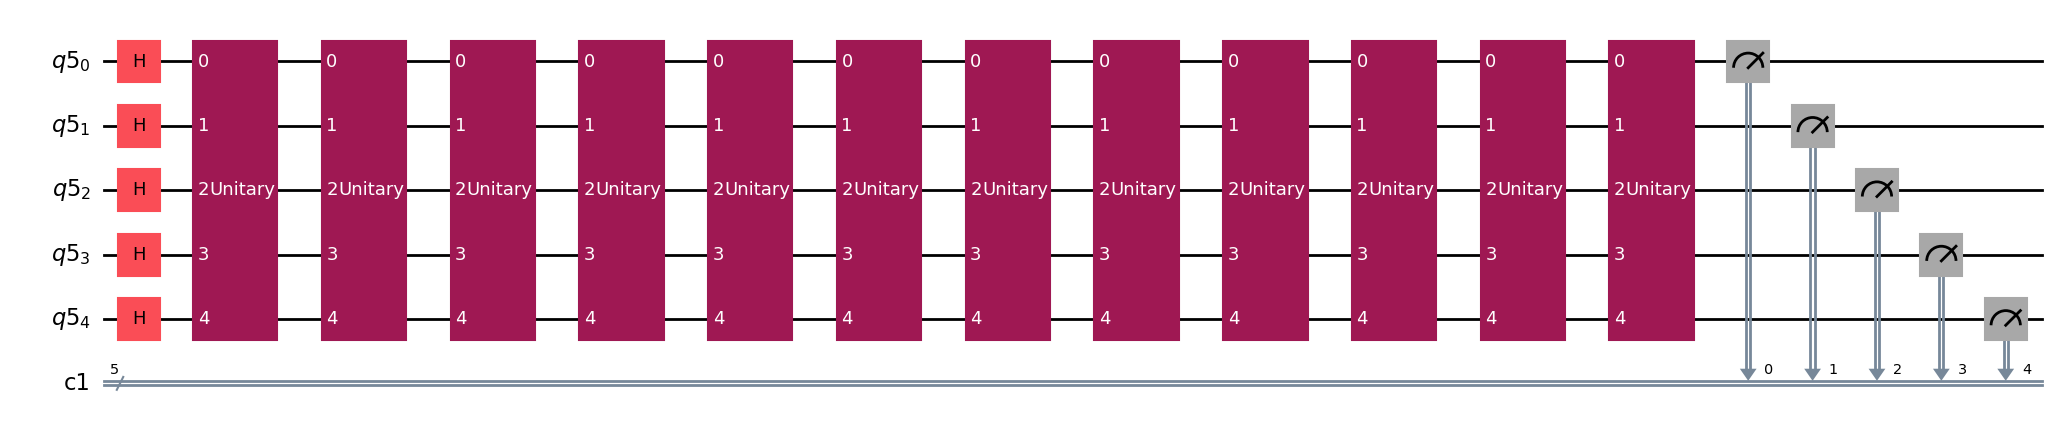

In [12]:
# qubits = 2
# qc = Grover(v=[3], qubits=qubits)
# qubits = 3
# qc = Grover(v=[5, 6], qubits=qubits)
qubits = 5
qc = Grover(v=[0, 2**qubits - 1], qubits=qubits)
qc.draw("mpl", fold=-1)

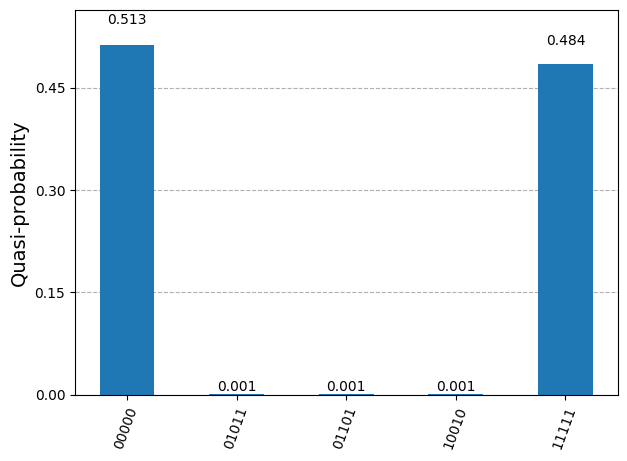

In [13]:
shots = 1024
simulator = AerSimulator()
qc = transpile(qc, simulator)
job = simulator.run(qc)
counts = job.result().get_counts(qc)
plot_distribution(counts)

In [14]:
# sv = Statevector(qc)
# sv.draw("latex")